In [ ]:
#import data
#see columns
#take out genre

 A company wants to segment its customers.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics

### Explanation on the dataset (e.g. why did you choose , what are you going to do with it etc.)

I decided to use this data set (Mall Customer Segmentation Data) from Kaggle to answer the question: "A company wants to segment its customers." I want to see if there will be clusters in the data to see which type of customers a company (like a mall) can have.

In [23]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
#make dummies
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)


#delete these columns so that the dataframe is numerical
del df['Gender']
del df['CustomerID']

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


### Explain which features you are going to use

So then I'm going to use age, annual income, spending score, and gender as the features for dimensionality reduction and then the clustering algorithms. I made dummies of df['Gender'] which yielded two columns df['Female'] and df['Male']. And then i deleted df['CustomerID'] because I thought this column may not give useful information regarding clusters in the data since it gives ID information.

In [34]:
df_columnnames= list(df.columns) #attaching column names in list form to a variable

from sklearn.preprocessing import StandardScaler

# Separating out the features
X = df[df_columnnames]

# Separating out the target
#y = df['neighbourhood_group']

# Standardizing the features
X_std = StandardScaler().fit_transform(X)

In [35]:
df.shape

(200, 5)

## PCA Dimensionality Reduction

In [72]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

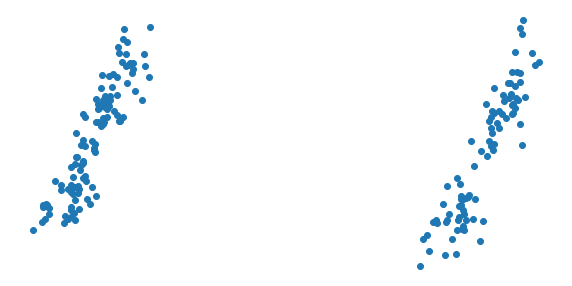

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## TSNE Dimensionality Reduction

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000) 
# since we want to visualize tsne in 2 dimensions, n_components = 2
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.013268
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.492237
[t-SNE] KL divergence after 1000 iterations: 0.158754


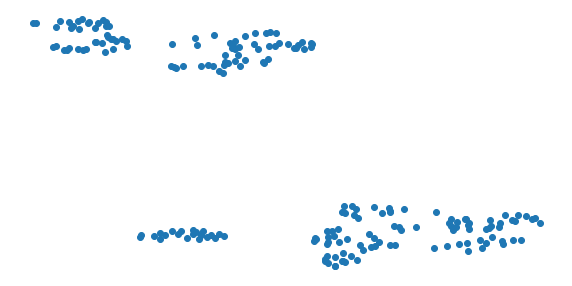

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## UMAP Dimensionality Reduction

In [40]:
import umap
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


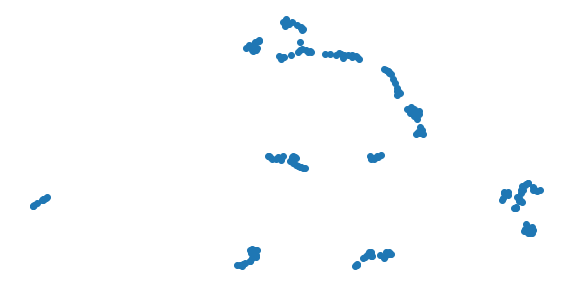

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()



Clusters are best visible in the dimensionality reduction plots from TSNE and PCA compared to UMAP. So I'll use tsne_results and pca_components in clustering then see which one will yield me the best silhouette score.



In [42]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

## GMM with t-SNE

In [44]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2) #, random_state=123)

# Fit model
clusters_gmm = gmm_cluster.fit_predict(tsne_results)

In [45]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(clusters_gmm[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [46]:
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters_gmm, metric='euclidean')))

The silhouette score of the GMM solution: 0.844636082649231


## GMM with PCA

In [74]:
# Defining the agglomerative clustering
gmm_cluster_pca = GaussianMixture(n_components=2) #, random_state=123)

# Fit model
clusters_gmm_pca = gmm_cluster.fit_predict(pca_components)

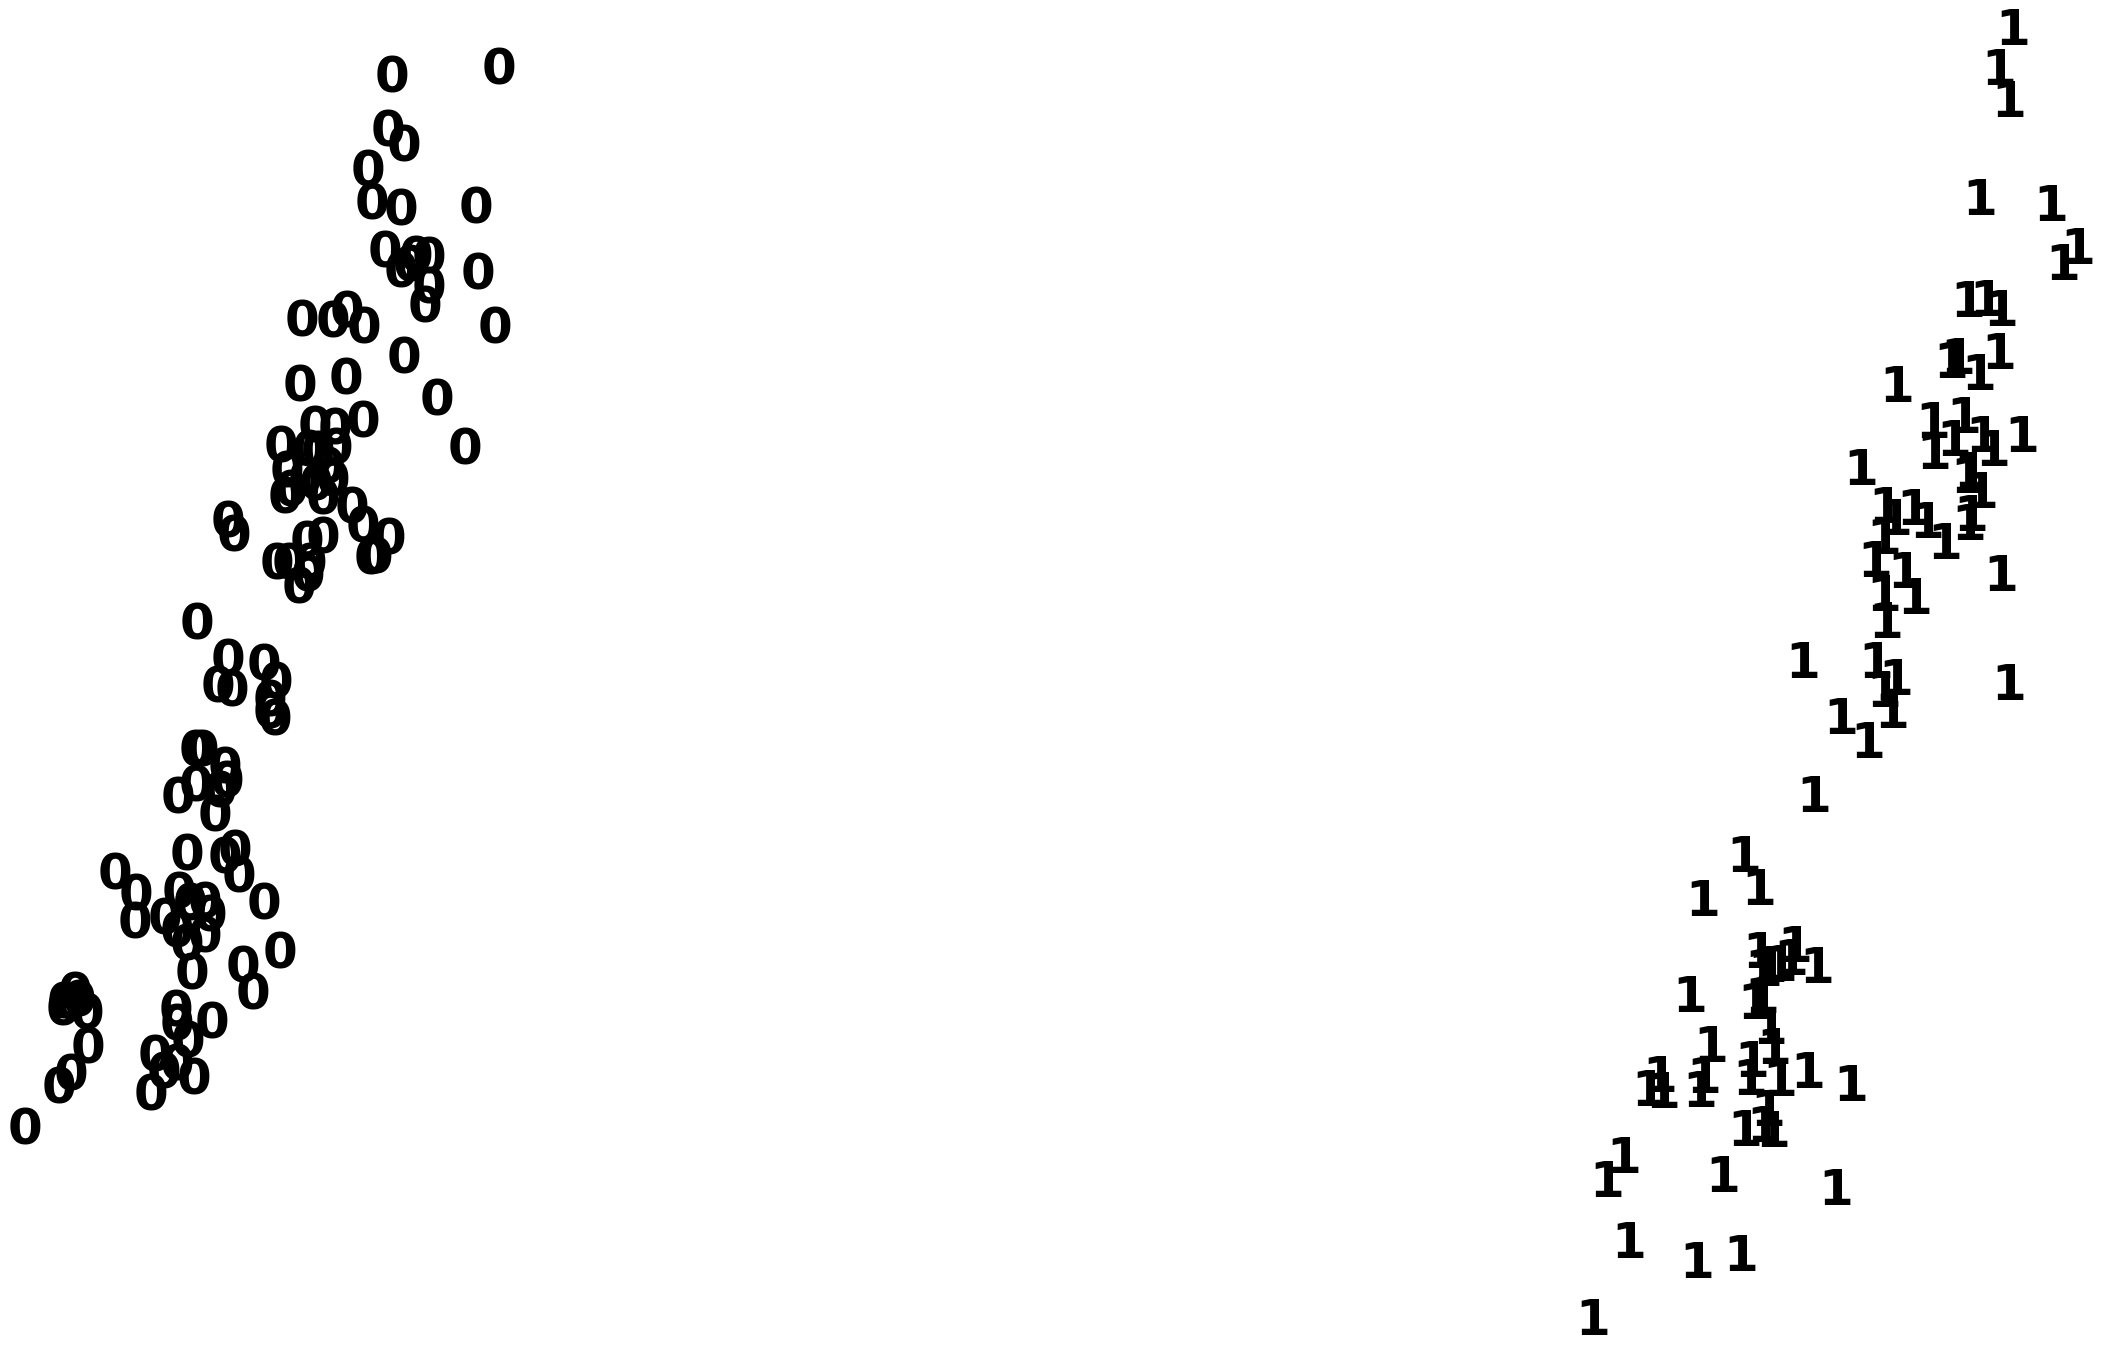

In [75]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(clusters_gmm_pca.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(clusters_gmm_pca[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [76]:
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters_gmm_pca, metric='euclidean')))

The silhouette score of the GMM solution: 0.5917646144799474


## Hierarchical Clustering with t-SNE

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=2)

# Fit model
clusters_agg = agg_cluster.fit_predict(tsne_results)

In [66]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(clusters_agg[i]),
             
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [81]:
print("The silhouette score of the Hierarchical Clustering solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters_agg, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution: 0.844636082649231


## Hierarchical Clustering with PCA

In [77]:
# Defining the agglomerative clustering
agg_cluster_pca = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=2)

# Fit model
clusters_agg_pca = agg_cluster.fit_predict(pca_components)

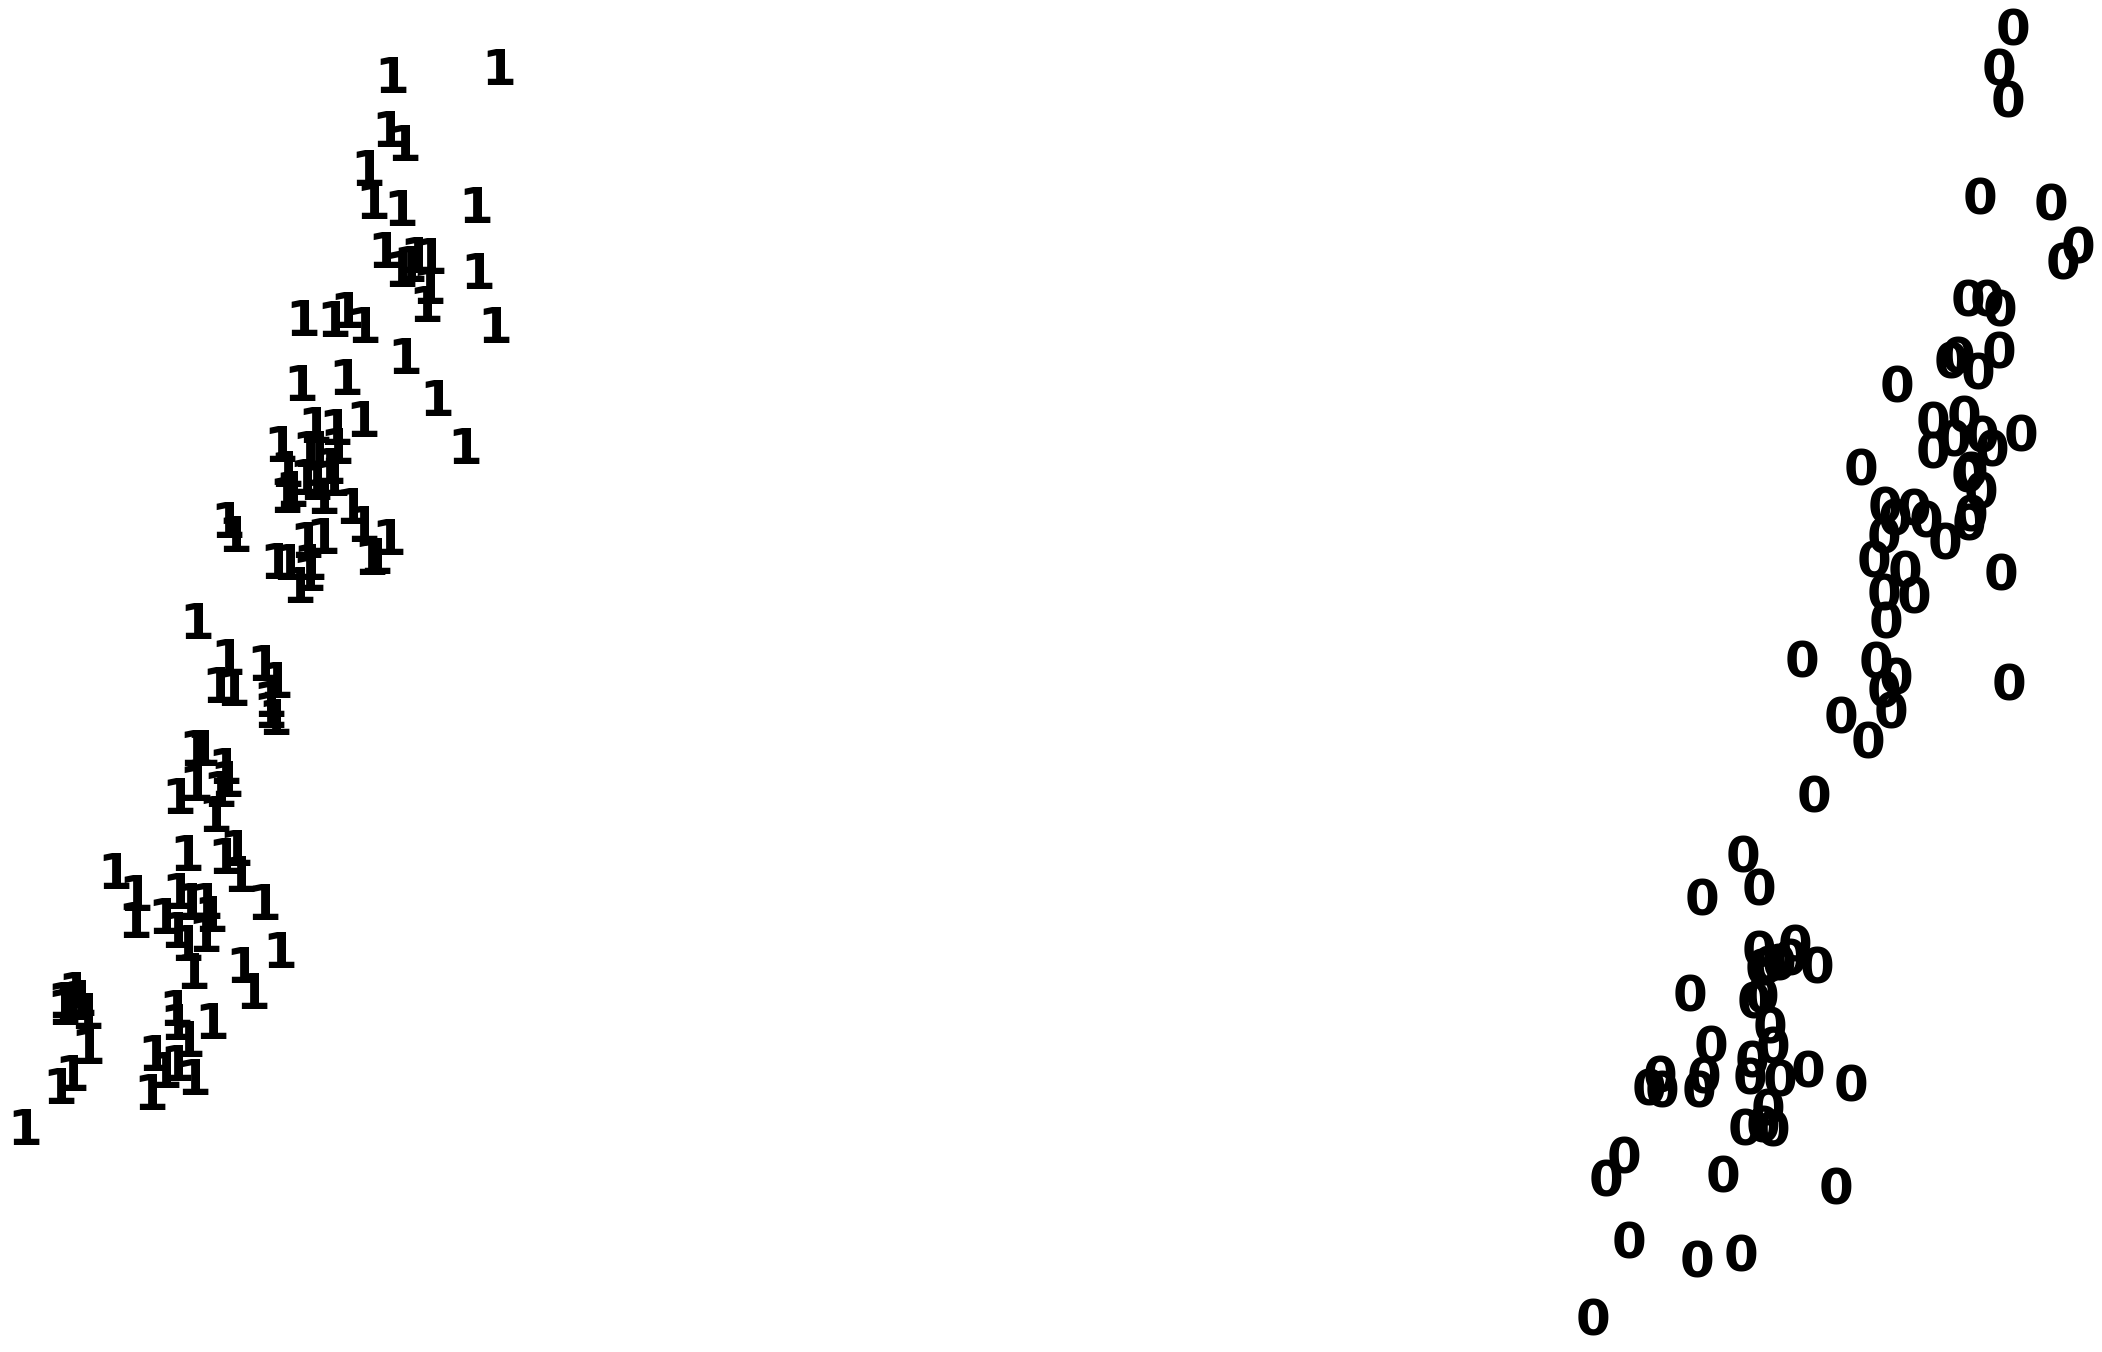

In [78]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(clusters_agg_pca[i]),
             
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [80]:
print("The silhouette score of the Hierarchical Clustering solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters_agg_pca, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution: 0.5917646144799474


In [83]:
from tabulate import tabulate
print()
print()
print()
headers = ['Dimensionality Reduction Technique','GMM','Hierarchical Clustering']
OG_values = [ ('PCA','0.5917646144799474','0.5917646144799474'),
              ('t-SNE*','0.844636082649231','0.844636082649231')
    
]

print(tabulate(OG_values, headers = headers))
print()
print()
print('*t-SNE outputs the best silhouette score from the clustering algorithms')
print('It also looks like GMM and Hierarchical Clustering perform identically')
print()
print()






Dimensionality Reduction Technique         GMM    Hierarchical Clustering
------------------------------------  --------  -------------------------
PCA                                   0.591765                   0.591765
t-SNE*                                0.844636                   0.844636


*t-SNE outputs the best silhouette score from the clustering algorithms
It also looks like GMM and Hierarchical Clustering perform identically




## DBSCAN with t-SNE

In [84]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(tsne_results)

In [85]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.446938693523407


## K-means with t-SNE

In [88]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
cluster_kmeans = kmeans_cluster.fit(tsne_results)
y_pred = kmeans_cluster.predict(tsne_results)

In [97]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y_pred[i]), 
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()



In [90]:
print("The silhouette score of the K-means solution: {}"
      .format(metrics.silhouette_score(tsne_results, y_pred, metric='euclidean')))

The silhouette score of the K-means solution: 0.844636082649231


## Final Silhouette Scores using t-SNE

In [93]:
print()
print()
print()
headers = ['GMM*','Hierarchical*','DBSCAN','K-means*']
OG_values = [ 
              ('0.844636082649231','0.844636082649231','0.446938693523407','0.844636082649231')
    
]

print(tabulate(OG_values, headers = headers))
print()
print()
print('*It Looks like GMM, Hierarchical Clustering, and K-means perform identically')
print('Which means we can use either clustering techniques working with t-SNE for dimensionality reduction')
print()
print()






    GMM*    Hierarchical*    DBSCAN    K-means*
--------  ---------------  --------  ----------
0.844636         0.844636  0.446939    0.844636


*It Looks like GMM, Hierarchical Clustering, and K-means perform identically
Which means we can use either clustering techniques working with t-SNE for dimensionality reduction




### You need to explain what you are trying to achieve while applying unsupervised learning methods. It is not clear. You can use performance metrics provided by the unsupervised methods for the comparison.

Through using unsupervised learning methods of clustering, I wanted to see similar groups from the mall customers dataset. Silhouette scores tells us how dense our clusters are from a range -1 to 1 with -1 being really bad clusters vs 1 being a good cluster. Seeing that GMM, Hierarchical Clustering, and K-means all have about a silhouette score of 0.845, this score tells us (and plots show) that these clustering algorithms produce dense, distinct clusters, which is good. And when we look at all the cluster plots for GMM, Hierarchical Clustering and K-means, we see two groupings, which tells us that in the mall customers dataset through using unsupervised learning methods, we see that there are two distinct types of customers who go to the mall.